Saving Base_diabetes.csv to Base_diabetes.csv
   Embarazos  Glucosa  Presion_sangre  Espesor_piel  Insulina   IMC  \
0          6      148              72            35         0  33.6   
1          1       85              66            29         0  26.6   
2          8      183              64             0         0  23.3   
3          1       89              66            23        94  28.1   
4          0      137              40            35       168  43.1   

   Historico_Diabetes  Edad  Categoria  
0               0.627    50          1  
1               0.351    31          0  
2               0.672    32          1  
3               0.167    21          0  
4               2.288    33          1  
(768, 9)


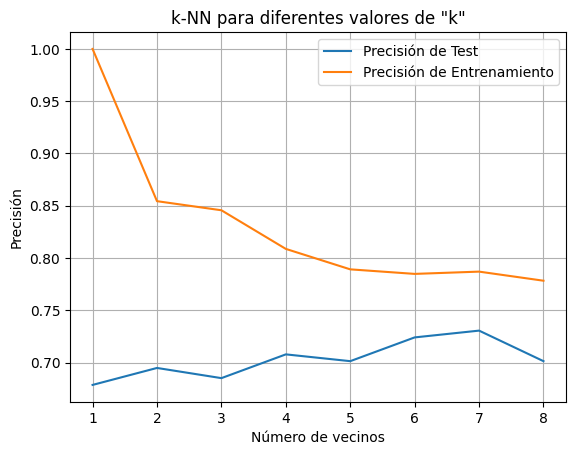

[[165  36]
 [ 47  60]]
Verdaderos positivos (VP): 60
Verdaderos negativos (VN): 165
Falsos positivos (FP): 36
Falsos negativos (FN): 47

Informe de clasificación (sobre datos de test)
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



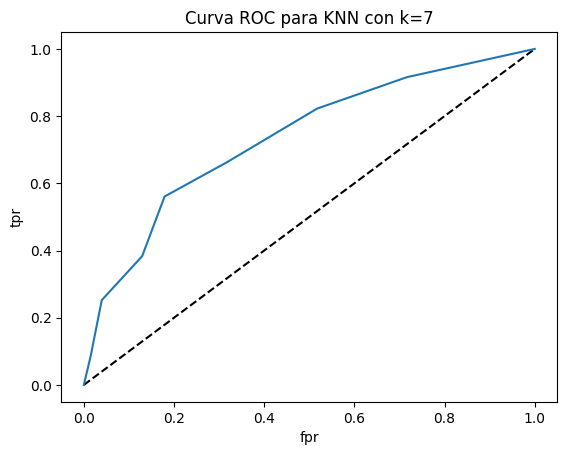

Área bajo la curva ROC: 0.7345050448691124
El paciente no tiene diabetes


In [1]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Subir archivo desde Google Colab
from google.colab import files
uploaded = files.upload()

# Leer el archivo CSV (ajusta el nombre del archivo según el archivo que hayas subido)
df = pd.read_csv("Base_diabetes.csv")

# Visualizar las primeras 5 filas de la tabla de datos
print(df.head())

# Ver el tamaño de la tabla de datos
print(df.shape)

# Crear los arrays para X e y
X = df.drop('Categoria', axis=1).values
y = df['Categoria'].values

# Dividir el conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Crear el clasificador basado en KNN
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Realizar el cálculo con diferentes valores de 'k'
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Visualizar el gráfico de la precisión de entrenamiento y test
plt.title('k-NN para diferentes valores de "k"')
plt.plot(neighbors, test_accuracy, label='Precisión de Test')
plt.plot(neighbors, train_accuracy, label='Precisión de Entrenamiento')
plt.legend()
plt.xlabel('Número de vecinos')
plt.ylabel('Precisión')
plt.grid()
plt.show()

# Calcular la matriz de confusión para k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Imprimir resultados de la matriz de confusión
print(cm)
print("Verdaderos positivos (VP):", cm[1][1])
print("Verdaderos negativos (VN):", cm[0][0])
print("Falsos positivos (FP):", cm[0][1])
print("Falsos negativos (FN):", cm[1][0])

# Informe de clasificación
print("\nInforme de clasificación (sobre datos de test)")
print(classification_report(y_test, y_pred))

# Curva ROC
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Dibujar la curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Curva ROC para KNN con k=7')
plt.show()

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Área bajo la curva ROC:", roc_auc)

# Predicción para un nuevo paciente
nuevo_paciente = [[1, 100, 70, 30, 90, 0.3, 0.2, 45]]
y_pred_nuevo = knn.predict(nuevo_paciente)

if y_pred_nuevo == 1:
    print("El paciente tiene diabetes")
else:
    print("El paciente no tiene diabetes")